# Project 
## Text Data Usage In Classfication
## Crew:Mert Kılınçer (2210765043) and Sümeyra Koç (2210765020)

## Data Loading

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 

## Explore The Data
be used functions are:
* head()
* shape()
* info()
* describe()

In [102]:
data = pd.read_csv("data.csv")

In [103]:
data.head()

,product_id,brand_name,review_id,review_title,review_text,author,review_date,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count,product_tags,product_url
0,781070,Olay,16752142,Worth buying 50g one,Works as it claims. Could see the difference f...,Ashton Dsouza,2021-01-23 15:17:18,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
1,781070,Olay,14682550,Best cream to start ur day,It does what it claims . Best thing is it smoo...,Amrit Neelam,2020-09-07 15:30:42,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
2,781070,Olay,15618995,perfect for summers dry for winters,I have been using this product for months now....,Sanchi Gupta,2020-11-13 12:24:14,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
3,781070,Olay,13474509,Not a moisturizer,"i have an oily skin, while this whip acts as a...",Ruchi Shah,2020-06-14 11:56:50,3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...
4,781070,Olay,16338982,Average,It's not that good. Please refresh try for oth...,Sukanya Sarkar,2020-12-22 15:24:35,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43,NaN,https://www.nykaa.com/olay-ultra-lightweight-m...


In [104]:
data.shape

(61284, 18)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61284 entries, 0 to 61283
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            61284 non-null  int64  
 1   brand_name            61284 non-null  object 
 2   review_id             61284 non-null  int64  
 3   review_title          61284 non-null  object 
 4   review_text           61275 non-null  object 
 5   author                61284 non-null  object 
 6   review_date           61284 non-null  object 
 7   review_rating         61283 non-null  float64
 8   is_a_buyer            61284 non-null  bool   
 9   pro_user              61284 non-null  bool   
 10  review_label          48249 non-null  object 
 11  product_title         61284 non-null  object 
 12  mrp                   61284 non-null  int64  
 13  price                 61284 non-null  int64  
 14  product_rating        61284 non-null  float64
 15  product_rating_coun

In [106]:
data.describe()

,product_id,review_id,review_rating,mrp,price,product_rating,product_rating_count
count,6.128400e+04,6.128400e+04,61283.000000,61284.000000,61284.000000,61284.000000,61284.000000
mean,7.983802e+05,1.484995e+07,4.414781,573.260247,462.129512,4.099130,7582.963840
std,1.281418e+06,7.383506e+06,1.062547,324.098930,264.876964,0.235945,14463.246136
min,2.500000e+02,9.600000e+01,1.000000,75.000000,45.000000,1.500000,1.000000
25%,1.604880e+05,1.102373e+07,4.000000,300.000000,262.000000,4.000000,1760.000000
50%,4.524430e+05,1.525142e+07,5.000000,599.000000,400.000000,4.100000,3925.000000
75%,7.665290e+05,2.002927e+07,5.000000,799.000000,639.000000,4.300000,8720.000000
max,7.749427e+06,2.963031e+07,5.000000,3874.000000,2947.000000,4.800000,98477.000000


### Describe and implament a few helper functions for data preprocessing

In [107]:
def percent_null_values_all_columns(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate the percentage of null values in each column of a DataFrame.

    Args:
    - df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    - pd.DataFrame: A DataFrame with two columns, 'Column' and 'Percent_Null', representing the percentage of null values in each column.
    """
    total_rows = len(df)
    null_percentage_data = []

    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_percentage = (null_count / total_rows) * 100
        formatted_null_percentage = round(null_percentage, 2)
        null_percentage_data.append({'Feature': column, 'Percent_Null': formatted_null_percentage})


    null_percentage_df = pd.DataFrame(null_percentage_data)
    print(null_percentage_df)

In [108]:
def unique_value_percentages_of_total(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate the percentage of unique values relative to the sum of all observations for each column in a DataFrame.

    Args:
    - df(pd.DataFrame): The DataFrame to analyze.

    Returns:
    - pd.DataFrame: A DataFrame with columns and their corresponding percentage of unique values of total observations.
    """
    total_observations = len(df)
    percentages = []

    for column in df.columns:
        num_unique_values = df[column].nunique()
        percentage = (num_unique_values / total_observations) * 100
        formatted_percentage = round(percentage, 2)
        percentages.append({'Column': column, 'Percentage_of_Total':formatted_percentage})

    percentage_df = pd.DataFrame(percentages)
    sorted_percentage_df = percentage_df.sort_values(by='Percentage_of_Total', ascending=False)

    return sorted_percentage_df

In [109]:
def drop_columns(df: pd.DataFrame, columns_to_drop: list) -> pd.DataFrame:
    """Drop specified columns from a DataFrame.

    Args:
    - df (pd.DataFrame): The DataFrame from which to drop columns.
    - columns_to_drop (list): A list of column names to be dropped.

    Returns:
    - pd.DataFrame: A new DataFrame with specified columns removed.
    """
    # Drop the specified columns
    df_dropped = df.drop(columns=columns_to_drop, errors='ignore')
    return df_dropped

## Data Preprocessing

In [110]:
# handle missing records
percent_null_values_all_columns(data)

                 Feature  Percent_Null
0             product_id          0.00
1             brand_name          0.00
2              review_id          0.00
3           review_title          0.00
4            review_text          0.01
5                 author          0.00
6            review_date          0.00
7          review_rating          0.00
8             is_a_buyer          0.00
9               pro_user          0.00
10          review_label         21.27
11         product_title          0.00
12                   mrp          0.00
13                 price          0.00
14        product_rating          0.00
15  product_rating_count          0.00
16          product_tags         77.97
17           product_url          0.00


In [111]:
# detect percentages of uniqueness of each varaibles to make decision to drop few of them 
unique_value_percentages_of_total(data)

,Column,Percentage_of_Total
2,review_id,100.00
6,review_date,99.88
4,review_text,97.63
5,author,67.99
3,review_title,48.23
0,product_id,0.48
11,product_title,0.48
17,product_url,0.48
15,product_rating_count,0.37
13,price,0.29


Columns to drop : 'review_id', 'product_tags','review_date','product_url','review_title','author'
* 'product_tags' contains completely none values
* 'review_id', 'review_date', 'author','review_title' has high percantage of uniqueness according to the above table. These variables cannot contribute to the learning of our classification algorithm in any way. So that we will drop them
* In the data set, there are 259 product in total. And also there is an url for each products. Since the product url has no effect on the like of the product, we are also dropping this variable.

In [112]:
columns_to_remove = ['review_id', 'product_tags','review_date','product_url','review_title','author'] 
df_dropped = drop_columns(data, columns_to_remove)
df_dropped

,product_id,brand_name,review_text,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count
0,781070,Olay,Works as it claims. Could see the difference f...,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
1,781070,Olay,It does what it claims . Best thing is it smoo...,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
2,781070,Olay,I have been using this product for months now....,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
3,781070,Olay,"i have an oily skin, while this whip acts as a...",3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
4,781070,Olay,It's not that good. Please refresh try for oth...,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
...,...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,I use this thrice a week. Has helped me in mak...,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61280,1044490,Herbal Essences,This shampoo has a amazing fragnance and textu...,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61281,1044490,Herbal Essences,"Used it for the first time, feels really fresh...",5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61282,1044490,Herbal Essences,One of the best shampoo which are sulphate and...,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512


In [113]:
# Handling missing values
df_dropped.isnull().sum()

product_id                  0
brand_name                  0
review_text                 9
review_rating               1
is_a_buyer                  0
pro_user                    0
review_label            13035
product_title               0
mrp                         0
price                       0
product_rating              0
product_rating_count        0
dtype: int64

In [114]:
# Fill with "false" value with all NaN values in the "review_label" columns.
df_dropped['review_label'] = df_dropped['review_label'].fillna(value="false")

In [115]:
df_dropped = df_dropped.dropna()
df_dropped.isnull().sum()

product_id              0
brand_name              0
review_text             0
review_rating           0
is_a_buyer              0
pro_user                0
review_label            0
product_title           0
mrp                     0
price                   0
product_rating          0
product_rating_count    0
dtype: int64

There is no missing value anymore

In [116]:
df_dropped

,product_id,brand_name,review_text,review_rating,is_a_buyer,pro_user,review_label,product_title,mrp,price,product_rating,product_rating_count
0,781070,Olay,Works as it claims. Could see the difference f...,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
1,781070,Olay,It does what it claims . Best thing is it smoo...,5.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
2,781070,Olay,I have been using this product for months now....,4.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
3,781070,Olay,"i have an oily skin, while this whip acts as a...",3.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
4,781070,Olay,It's not that good. Please refresh try for oth...,2.0,True,False,Verified Buyer,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
...,...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,I use this thrice a week. Has helped me in mak...,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61280,1044490,Herbal Essences,This shampoo has a amazing fragnance and textu...,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61281,1044490,Herbal Essences,"Used it for the first time, feels really fresh...",5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61282,1044490,Herbal Essences,One of the best shampoo which are sulphate and...,5.0,True,False,Verified Buyer,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512


* We want to drop the "review_label" column:
* Because of "is_a_buyer" and "review_label" columns are equal that is they have same values for all records, just values names are different:
* True or False for "is_a_buyer" column while Verified Buyer or Nan for "review_label" column (NaN means false in this column)
* We have shown below that these two columns are equal and we have dropped one of them which is "review_label"

In [117]:
result_count = len(df_dropped[(df_dropped['is_a_buyer'] == True) & (df_dropped['review_label'] == "false" )]) + len(df_dropped[(df_dropped['is_a_buyer'] == False) & (df_dropped['review_label'] =="Verified Buyer" ) ])

# print the result
print("There is no case where the is_a_buyer column is True while the other review_label is false: ", result_count)

There is no case where the is_a_buyer column is True while the other review_label is false:  0


In [118]:
df_dropped = df_dropped.drop('review_label', axis=1)
df_dropped # the final version of the data set

,product_id,brand_name,review_text,review_rating,is_a_buyer,pro_user,product_title,mrp,price,product_rating,product_rating_count
0,781070,Olay,Works as it claims. Could see the difference f...,5.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
1,781070,Olay,It does what it claims . Best thing is it smoo...,5.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
2,781070,Olay,I have been using this product for months now....,4.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
3,781070,Olay,"i have an oily skin, while this whip acts as a...",3.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
4,781070,Olay,It's not that good. Please refresh try for oth...,2.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,1999,1599,4.1,43
...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,I use this thrice a week. Has helped me in mak...,5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61280,1044490,Herbal Essences,This shampoo has a amazing fragnance and textu...,5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61281,1044490,Herbal Essences,"Used it for the first time, feels really fresh...",5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61282,1044490,Herbal Essences,One of the best shampoo which are sulphate and...,5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512


#### Data Analysis for Outlier Handling
Above, we have gotten some information about data with built in function like info(),describe() etc. But this is not enough for which method to use for outlier detection. So that, we will try to understand the data a little deeper by plotting graphs

In [119]:
# helper function for plotting graphs
def plot_distributions(data: pd.DataFrame,columns_to_plot=None) -> None:
    """
    Plot distributions for each column in the provided DataFrame.

    This function iterates over the specified columns (or each column if none are specified)
    in the DataFrame and plots the distribution.For numerical columns, a histogram with a 
    Kernel Density Estimate (KDE) is plotted. For categorical columns, a countplot is used.

    Parameters:
    - data (pandas.DataFrame): The DataFrame containing the data for which distributions
                               are to be plotted.
    - columns_to_plot (list, optional): A list of column names to plot. If None, all
                                        columns will be plotted.

    Returns:
    - None: This function does not return any value. It directly displays the plots.
    """
    if columns_to_plot is None:
        columns_to_plot = data.columns

    for column in columns_to_plot:
        if column in data.columns:
            plt.figure(figsize=(10,4))

        # Check if the column is numeric or categorical
            if data[column].dtype == 'object' or data[column].dtype == 'bool':
                # For categorical data, use countplot
                sns.countplot(y=column, data=data)
                plt.title(f'Distribution of {column}')
            else:
                # For numerical data, use histogram
                sns.histplot(data[column], kde=True)
                plt.title(f'Distribution of {column}')
            
            plt.show() 
        else:
            print(f"Column '{column}' not found in DataFrame.")

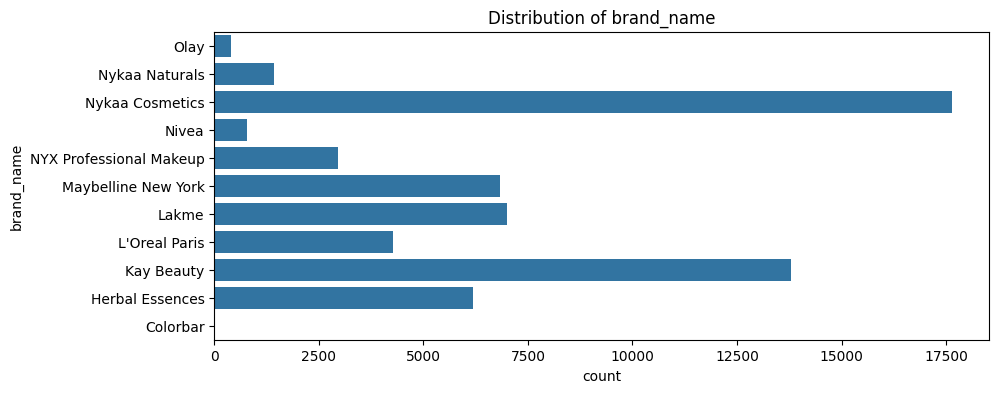

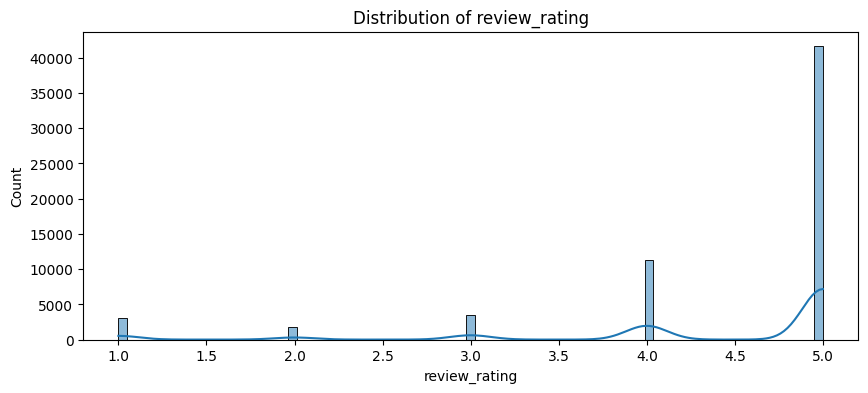

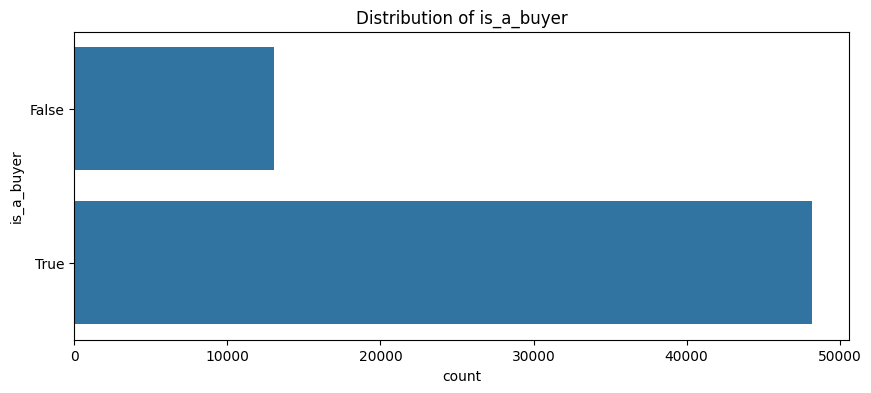

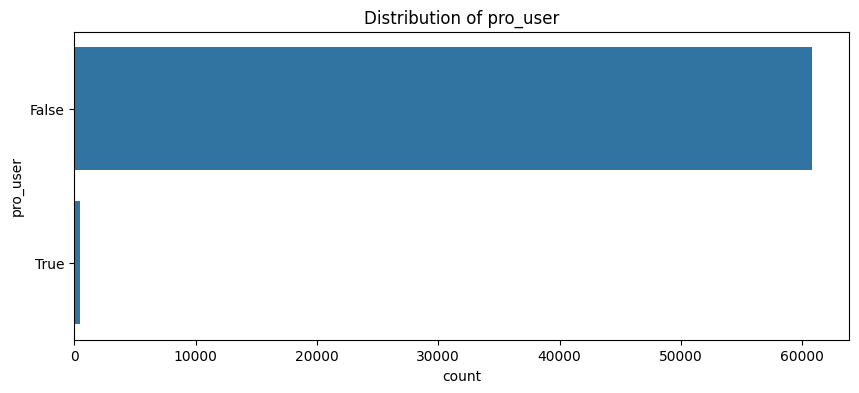

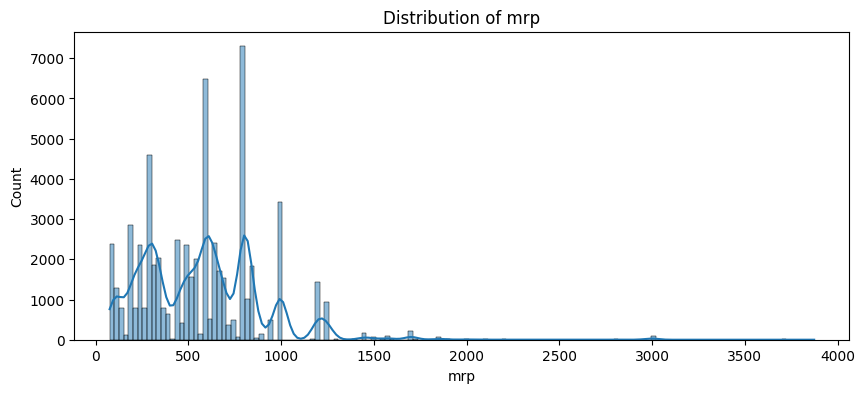

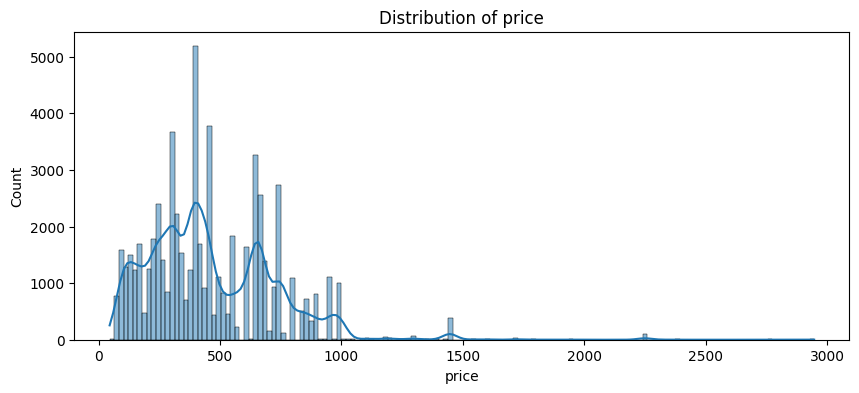

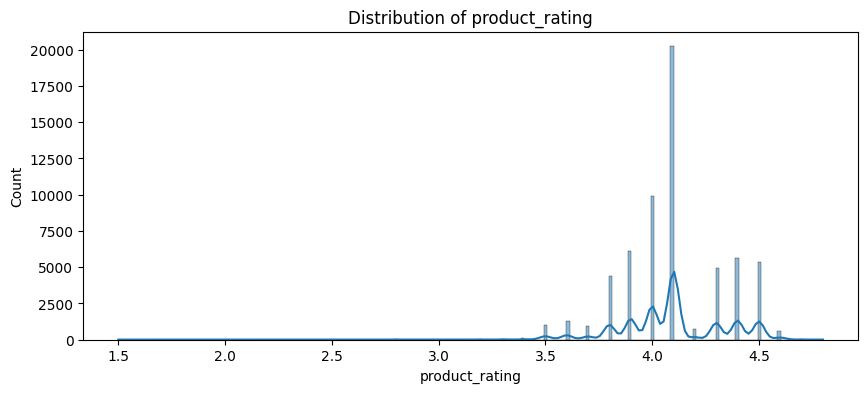

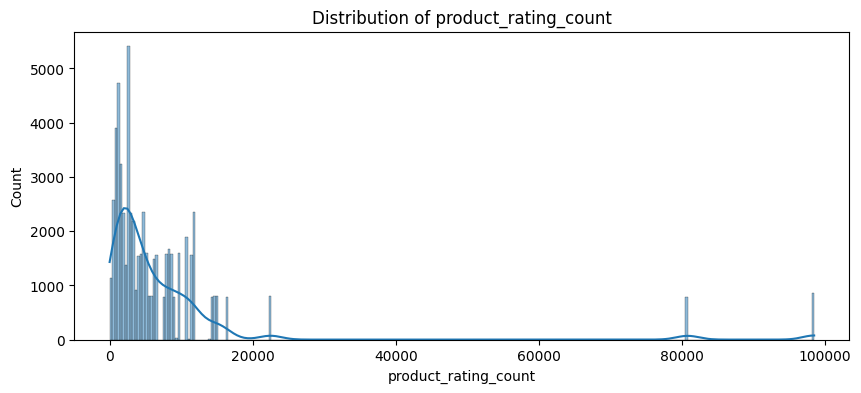

In [120]:
columns_to_plot=['brand_name','review_rating','is_a_buyer','pro_user','mrp','price','product_rating','product_rating_count']
plot_distributions(df_dropped,columns_to_plot=columns_to_plot)

#### Outlier Handling
* For which columns should we apply outlier detect: As you can see above graphs, there is no outlier for categorical variables such as 'is_a_buyer', 'pro_user' etc. So we will handle only the outliers of 'mrp','price','product_rating_count' variables.
* Which method should we use:
  * IQR is based on the median and quadrants of the data, so it is useful in data sets that are not normally distributed or symmetric
  * Z-Score Method uses the median when identifying outliers, so it may be appropriate for normal undistributed datasets
  * As you can see from the graphs above, our data has not a normal distribution (especially 'mrp','price','product_rating_count' columns), so that we should use IQR method for outlier detection.

In [121]:
# helper function for outlier detecting 
features = ['mrp','price','product_rating_count']
def detect_outliers(series):
    # Quartile of features
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    # Interquartile range calculation
    IQR = Q3 - Q1
    mild_outlier_threshold = 1.5 * IQR
    # Selecting outliers
    outliers = ((series < (Q1 - mild_outlier_threshold)) | (series > (Q3 + mild_outlier_threshold))).sum()
    
    return outliers

# Store the counts of outliers in a new DataFrame
outlier_counts = pd.DataFrame(columns=['Outliers'])


for column in features:
    # Traverse within numberical features to find exact count of outliers for each feature.
    outliers= detect_outliers(df_dropped[column])
    # Adding them to dataframe
    outlier_counts.loc[column] = [outliers]

outlier_counts 

,Outliers
mrp,602
price,672
product_rating_count,2438


In [122]:
# outlier handling by median imputation
for feature in features:
    # Quartile of features
    q1 = df_dropped[feature].quantile(0.25)
    q3 = df_dropped[feature].quantile(0.75)
    # IQR calculation
    iqr = q3-q1
    # Upper and lower bounds for values in data set that is acceptable
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    df_dropped[feature]=df_dropped[feature].mask((df_dropped[feature] < lower_fence) | (df_dropped[feature] > upper_fence), df_dropped[feature].median())
    

In [123]:
df_dropped # final version of data set

,product_id,brand_name,review_text,review_rating,is_a_buyer,pro_user,product_title,mrp,price,product_rating,product_rating_count
0,781070,Olay,Works as it claims. Could see the difference f...,5.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,599,400,4.1,43
1,781070,Olay,It does what it claims . Best thing is it smoo...,5.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,599,400,4.1,43
2,781070,Olay,I have been using this product for months now....,4.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,599,400,4.1,43
3,781070,Olay,"i have an oily skin, while this whip acts as a...",3.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,599,400,4.1,43
4,781070,Olay,It's not that good. Please refresh try for oth...,2.0,True,False,Olay Ultra Lightweight Moisturiser: Luminous W...,599,400,4.1,43
...,...,...,...,...,...,...,...,...,...,...,...
61279,1044490,Herbal Essences,I use this thrice a week. Has helped me in mak...,5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61280,1044490,Herbal Essences,This shampoo has a amazing fragnance and textu...,5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61281,1044490,Herbal Essences,"Used it for the first time, feels really fresh...",5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512
61282,1044490,Herbal Essences,One of the best shampoo which are sulphate and...,5.0,True,False,Herbal Essences Aloe & Eucalyptus Shampoo For ...,750,525,4.3,512


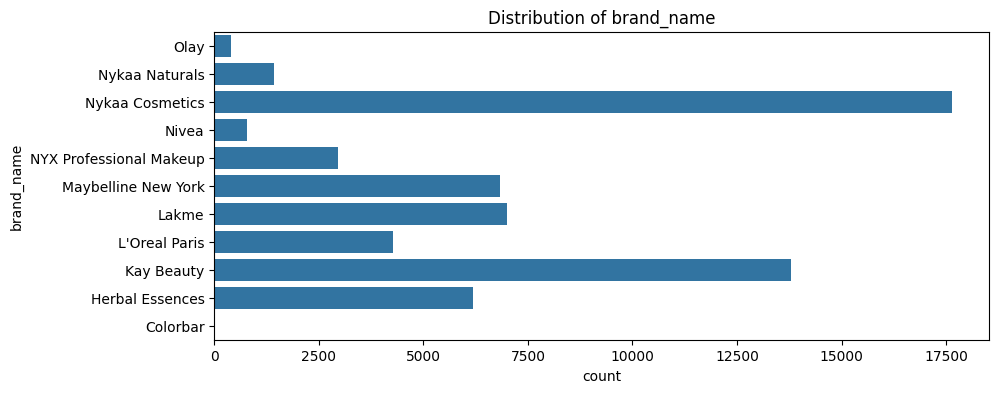

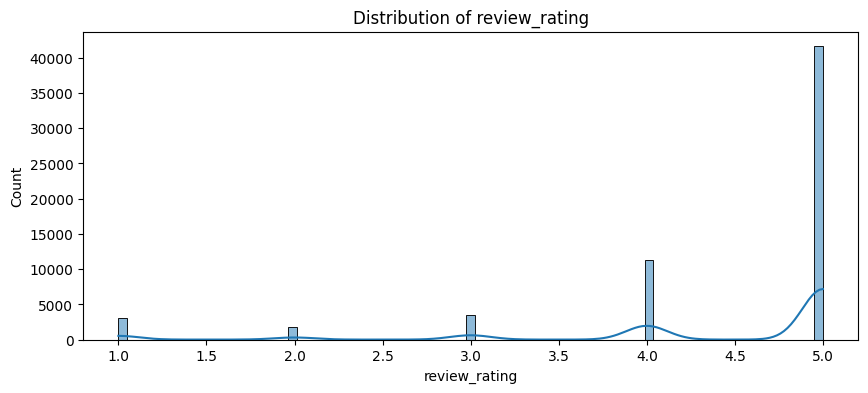

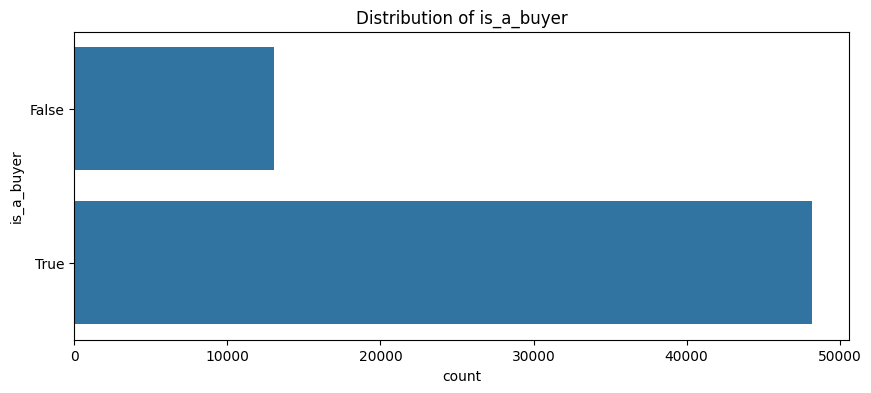

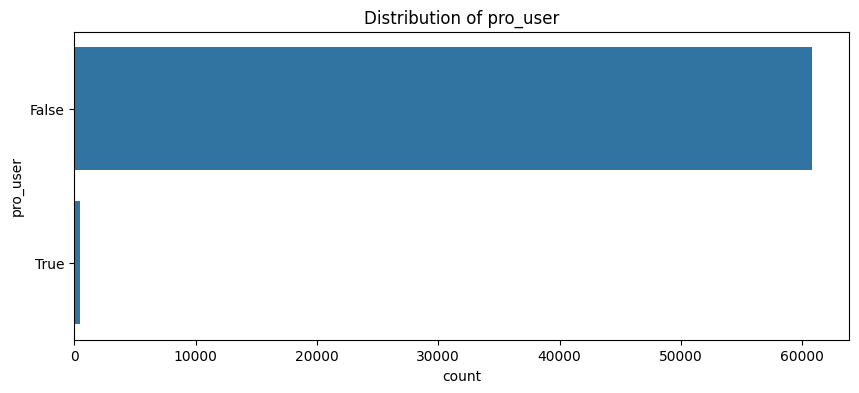

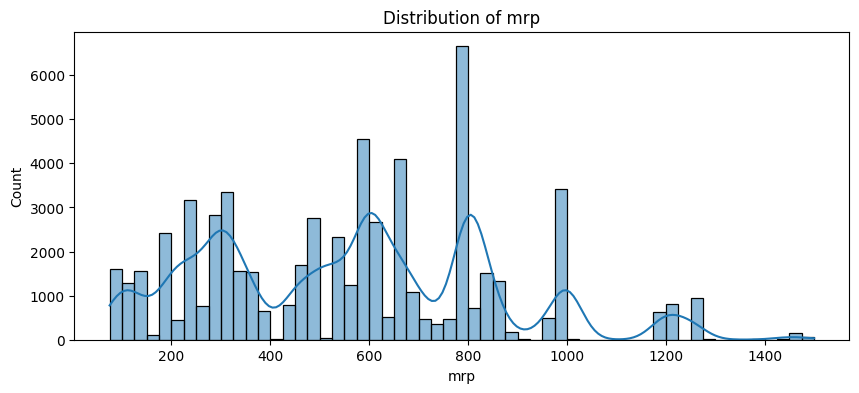

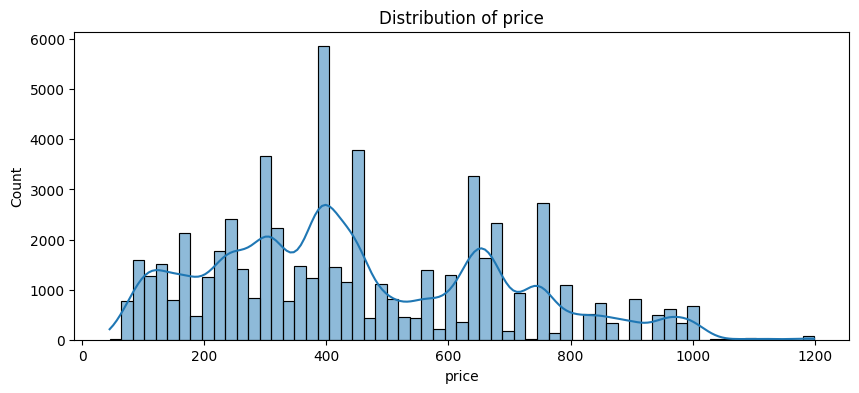

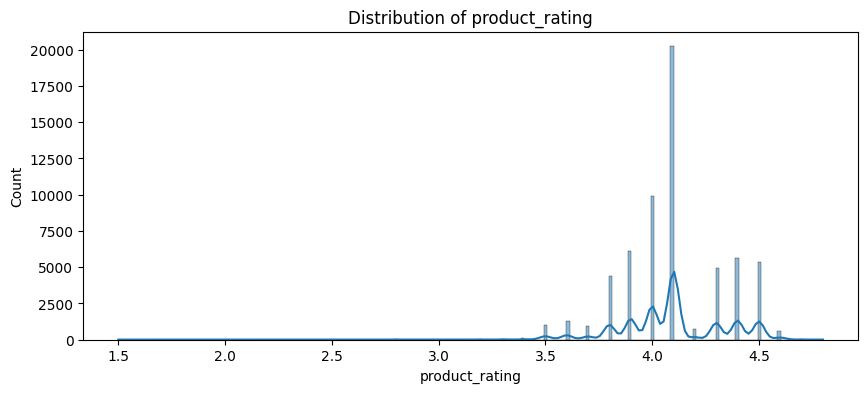

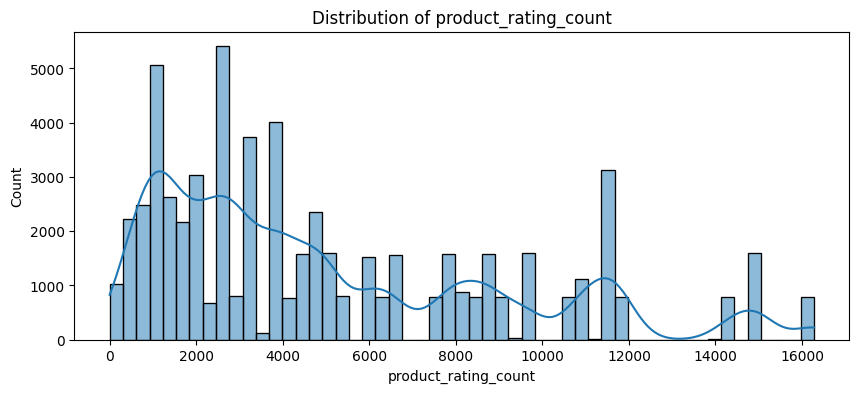

In [124]:
# plot graphs again to see if outlier handling is work
plot_distributions(df_dropped,columns_to_plot=columns_to_plot)

By comparing the old and new graphs for each variable whose outliers we have handled, you can see that the graphs of the variables  have a normal distribution now.

#### Data Encoding
Convert non-numeric values to numeric by encoding

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
label_encoder = LabelEncoder()

# Encode specific columns
columns_to_encode = ['brand_name','product_id','is_a_buyer','pro_user','product_title']

for column in columns_to_encode:
    df_dropped[column] = label_encoder.fit_transform(df_dropped[column])

# Display the DataFrame with encoded columns
df_dropped

,product_id,brand_name,review_text,review_rating,is_a_buyer,pro_user,product_title,mrp,price,product_rating,product_rating_count
0,127,10,Works as it claims. Could see the difference f...,5.0,1,0,288,599,400,4.1,43
1,127,10,It does what it claims . Best thing is it smoo...,5.0,1,0,288,599,400,4.1,43
2,127,10,I have been using this product for months now....,4.0,1,0,288,599,400,4.1,43
3,127,10,"i have an oily skin, while this whip acts as a...",3.0,1,0,288,599,400,4.1,43
4,127,10,It's not that good. Please refresh try for oth...,2.0,1,0,288,599,400,4.1,43
...,...,...,...,...,...,...,...,...,...,...,...
61279,143,1,I use this thrice a week. Has helped me in mak...,5.0,1,0,7,750,525,4.3,512
61280,143,1,This shampoo has a amazing fragnance and textu...,5.0,1,0,7,750,525,4.3,512
61281,143,1,"Used it for the first time, feels really fresh...",5.0,1,0,7,750,525,4.3,512
61282,143,1,One of the best shampoo which are sulphate and...,5.0,1,0,7,750,525,4.3,512


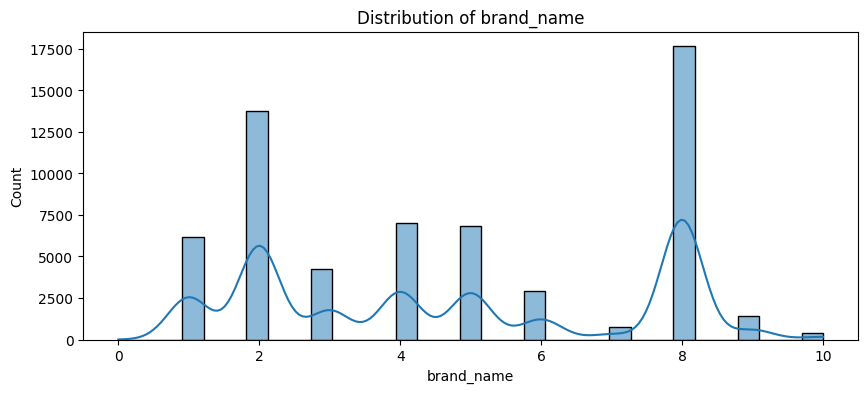

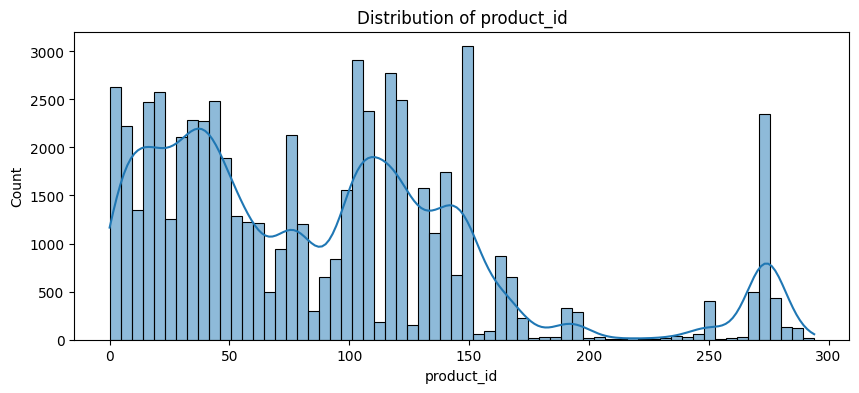

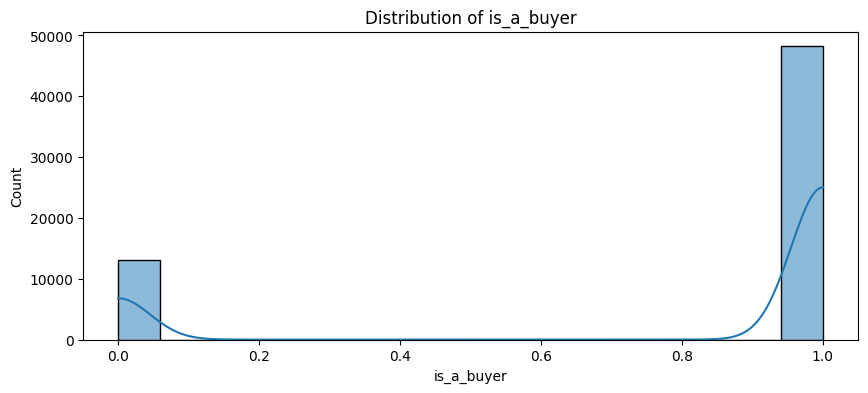

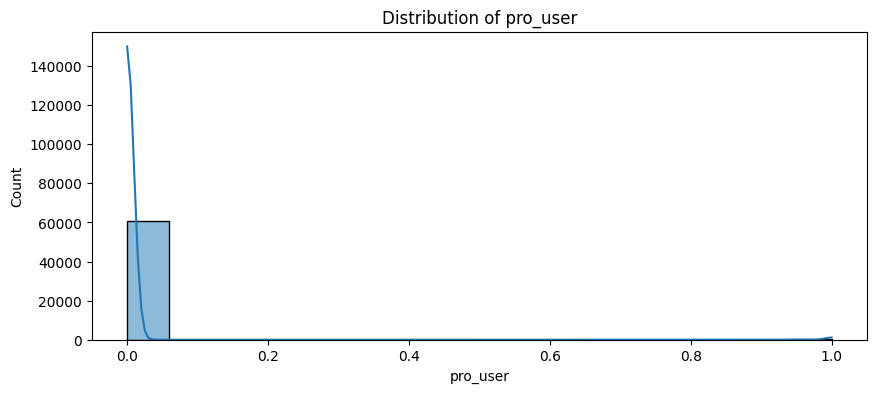

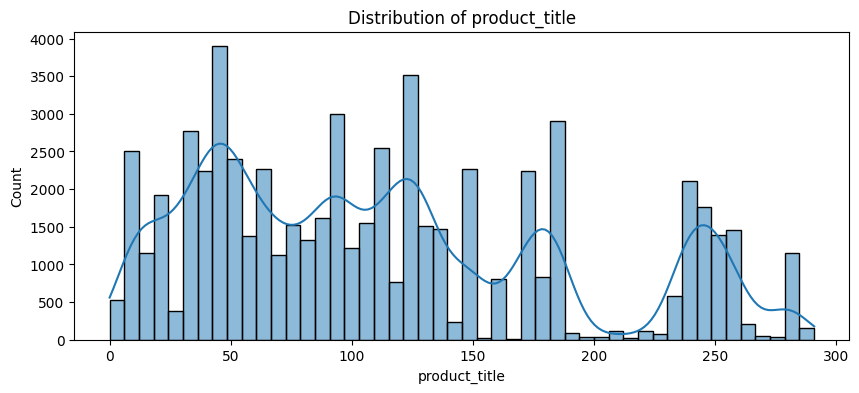

In [127]:
# again, plot the graphs of variables which is encode-applied
plot_distributions(df_dropped,columns_to_encode)

#### Feature Engineering For Text Data
* Analysis of text data
  * Measure how emotional the text is with "sentiment.subjectivity" method
  * Measure the degree to which the text is positive or negative with "sentiment.polarity" method
  * Add the results to the new columns named 'review_sentiment_polarity' and 'review_sentiment_subjectivity'
  * Drop the 'review_text' column, because it is useless now

In [128]:
from textblob import TextBlob

In [129]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity

In [130]:
# Analysis of text data
df_dropped['review_text'] = df_dropped['review_text'].astype(str)
df_dropped['review_sentiment_polariy'] = df_dropped['review_text'].apply(getPolarity)
df_dropped['review_sentiment_subjectivity'] = df_dropped['review_text'].apply(getSubjectivity)
df_dropped.drop(columns='review_text', inplace=True)
df_dropped

,product_id,brand_name,review_rating,is_a_buyer,pro_user,product_title,mrp,price,product_rating,product_rating_count,review_sentiment_polariy,review_sentiment_subjectivity
0,127,10,5.0,1,0,288,599,400,4.1,43,0.625000,0.316667
1,127,10,5.0,1,0,288,599,400,4.1,43,0.566667,0.483333
2,127,10,4.0,1,0,288,599,400,4.1,43,0.666667,0.750000
3,127,10,3.0,1,0,288,599,400,4.1,43,-0.050000,0.616667
4,127,10,2.0,1,0,288,599,400,4.1,43,0.287500,0.487500
...,...,...,...,...,...,...,...,...,...,...,...,...
61279,143,1,5.0,1,0,7,750,525,4.3,512,0.194000,0.744000
61280,143,1,5.0,1,0,7,750,525,4.3,512,0.566667,0.800000
61281,143,1,5.0,1,0,7,750,525,4.3,512,0.383333,0.611111
61282,143,1,5.0,1,0,7,750,525,4.3,512,0.600000,0.650000


## Data Analysis
* Get some of the critical statistics about the data
* Carry out clustering analysis on the data

In [135]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# helper function for clustering
def perform_kmeans_clustering(data, feature_columns, n_clusters):
    # Select features
    X = data[feature_columns]
    
    # Create and apply the K-Means clustering model
    kmeans = KMeans(n_clusters=n_clusters,n_init=10)
    data['cluster'] = kmeans.fit_predict(X)

    # Visualization
    plt.scatter(data[feature_columns[0]], data[feature_columns[1]], c=data['cluster'], cmap='viridis')
    plt.title(f'K-Means Clustering ({n_clusters} Cluster)')
    plt.xlabel(feature_columns[0])
    plt.ylabel(feature_columns[1])
    plt.show()


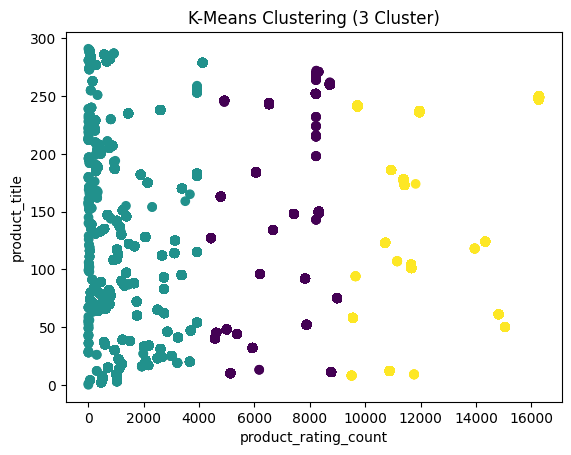

In [151]:
selected_features = ['product_rating_count', 'product_title']
perform_kmeans_clustering(df_dropped, selected_features, n_clusters=3)

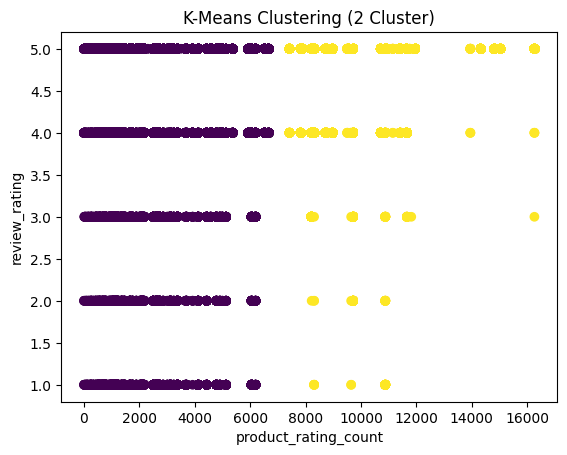

In [146]:
selected_features = ['product_rating_count', 'review_rating']
perform_kmeans_clustering(df_dropped, selected_features, n_clusters=3)

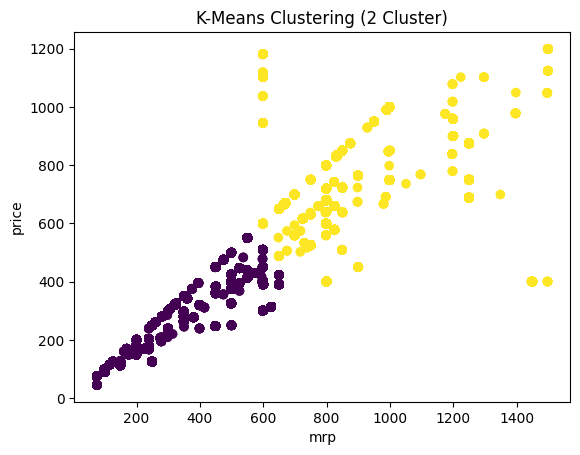

In [145]:
selected_features = ['mrp', 'price']
perform_kmeans_clustering(df_dropped, selected_features, n_clusters=2)

## Predictive Modelling
* Normalization
* Create a heatmap
* 
* 

In [152]:
# Normalization (since clustering the data in a scaled form will make it difficult to interpret, we have left the normalization until after the data analysis)

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the data
scaler = MinMaxScaler()

# Fit the scaler and transform the data
data_scaled = scaler.fit_transform(df_dropped)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=df_dropped.columns)

data_scaled_df

,product_id,brand_name,review_rating,is_a_buyer,pro_user,product_title,mrp,price,product_rating,product_rating_count,review_sentiment_polariy,review_sentiment_subjectivity,cluster
0,0.431973,1.0,1.00,1.0,0.0,0.989691,0.367978,0.307626,0.787879,0.002580,0.812500,0.316667,0.5
1,0.431973,1.0,1.00,1.0,0.0,0.989691,0.367978,0.307626,0.787879,0.002580,0.783333,0.483333,0.5
2,0.431973,1.0,0.75,1.0,0.0,0.989691,0.367978,0.307626,0.787879,0.002580,0.833333,0.750000,0.5
3,0.431973,1.0,0.50,1.0,0.0,0.989691,0.367978,0.307626,0.787879,0.002580,0.475000,0.616667,0.5
4,0.431973,1.0,0.25,1.0,0.0,0.989691,0.367978,0.307626,0.787879,0.002580,0.643750,0.487500,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61269,0.486395,0.1,1.00,1.0,0.0,0.024055,0.474017,0.415945,0.848485,0.031388,0.597000,0.744000,0.5
61270,0.486395,0.1,1.00,1.0,0.0,0.024055,0.474017,0.415945,0.848485,0.031388,0.783333,0.800000,0.5
61271,0.486395,0.1,1.00,1.0,0.0,0.024055,0.474017,0.415945,0.848485,0.031388,0.691667,0.611111,0.5
61272,0.486395,0.1,1.00,1.0,0.0,0.024055,0.474017,0.415945,0.848485,0.031388,0.800000,0.650000,0.5


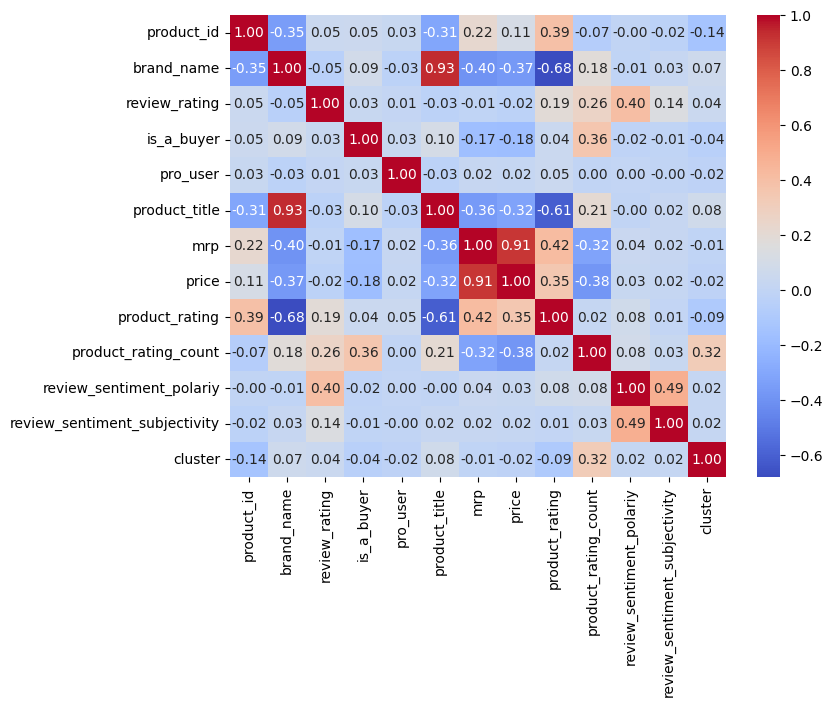

In [153]:
correlation_matrix = data_scaled_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the heatmap
plt.show()